# <center >Data Science with Python 
## <center >Statistical and Data Technique in Data Science 
##  <center> Homework 4

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Question 1: Data information
* Download data from the link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
(or `customers.csv` in the folder attached ).
* Import the data as the name 'data' and check the data head, shape, types, columms. (*Hint:*   `.head()`, `.shape`, `.dtypes`, `.columns.tolist()`.).
* Convert columns excluding 'Channel' and 'Region' to floats if necessary (*Hint:*  `.astype(np.float)`.)
* Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used 

In [1]:
import pandas as pd
import numpy as np
# Write your code from here, add more cells if needed

# Load data sample 
data = pd.read_csv("customers.csv")
# check data 

data.head()
#data.shape
#data.dtypes
#data.columns.tolist()

#Convert columns excluding 'Channel' and 'Region' to floats if necessary
#see more at http://pbpython.com/pandas_dtypes.html
data.dtypes
print ('After convert to float: ')
data['Channel']=data.Channel.astype(float)
data['Region']=data.Region.astype(float)
data.dtypes
#way 2:
data = pd.read_csv("customers.csv", dtype={'Channel':float,'Region':float})
data.dtypes

#Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used
#https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/

#columns = ['Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen']
#If have axis 
#data.drop('Chanel', axis = 1,inplace=True)
#if don't have any axis
import pandas as pd
df = pd.read_csv('customers.csv')
df1 = df.drop(columns=['Channel','Region','Frozen','Detergents_Paper'])
df1.head()



After convert to float: 


Fresh  Milk  Grocery  Delicatessen
0  12669  9656     7561          1338
1   7057  9810     9568          1776
2   6353  8808     7684          7844
3  13265  1196     4221          1788
4  22615  5410     7198          5185

### Quesiton 2: Statistical Description
In this question, we only work on the feature 'Grocery'.
 * Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
 * Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
 * Make a boxplot of the annual spending on grocery products.
 * Make a histogram of the annual spending on grocery products.

IQR: 8502.75
max: 92780
3.5874286903915453
20.914670390919653


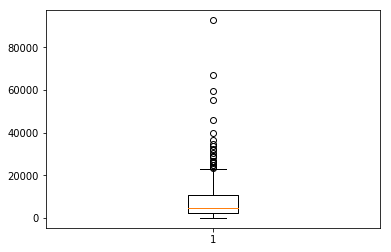

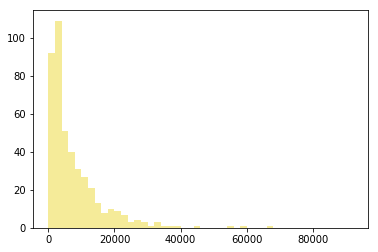

In [9]:
# Write your answer from here, add more cells if needed
# see full sample here https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/
data.head()
#Stattistic  on the feature 'Grocery'
#Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
data['Grocery'].min()
data['Grocery'].median()
data['Grocery'].max()
# Computing IQR
Q1 = data['Grocery'].quantile(0.25)
Q3 = data['Grocery'].quantile(0.75)
IQR = Q3 - Q1

print("IQR:",IQR)
print("max:",data['Grocery'].max())
data['Grocery'].describe()

# Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
data['Grocery'].mean()
range=data['Grocery'].max()-data['Grocery'].min()
#standard deviation (std)
data['Grocery'].std()
# cal skewness
print(data['Grocery'].skew())
print(data['Grocery'].kurt())

#Make a boxplot of the annual spending on grocery products
import matplotlib.pyplot as plt
plt.boxplot(data['Grocery'])
plt.show()
# Make a histogram of the annual spending on grocery products.
# Create bins of 2000 each=> bin????
data1=data['Grocery']
bins = np.arange(data1.min(), data1.max(), 2000) # fixed bin size

# Plot a histogram of attacker size
plt.hist(data1, 
         bins=bins, 
         alpha=0.5, 
         color='#EDD834',
         label='Grocery')
plt.show()




### Question 3: Correlation
* Calculate the correlation of 'Grocery' and 'Milk'.
* Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
* Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
* Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )

Correlation: 0.7283351181536448
p-value for non-correlation: 6.480570788053402e-74


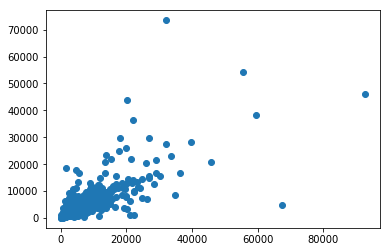

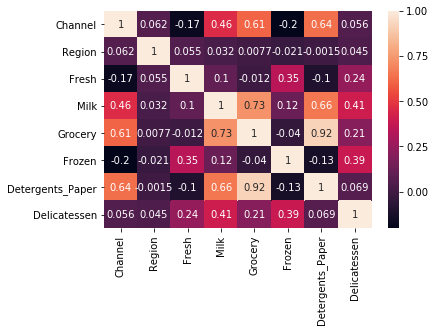

In [16]:
# Write your answer from here, add more cells if needed
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
# Load data sample 
data = pd.read_csv("customers.csv")

# Calculate the correlation of 'Grocery' and 'Milk'.
c, p = ss.pearsonr(data['Grocery'],data['Milk'])
print("Correlation:", c)
print("p-value for non-correlation:", p)

#Make a scatter plot of 'Grocery' and 'Milk'.

plt.scatter(data['Grocery'],data['Milk'])
plt.show()

#Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
# Produce a scatter matrix for each pair of features in the data
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


#Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )
import seaborn as sns
sns.heatmap(data.corr(), annot=True)


### Question 4: Hypothesis testing (part 1)
* Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

In [10]:
# Write your answer from here, add more cells if needed
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
# Load data sample 
data = pd.read_csv("customers.csv")


#Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
c1, p1 = ss.pearsonr(data['Grocery'],data['Fresh'])
print("Correlation:", c1)
print("p-value for non-correlation:", p1)

c2, p2 = ss.pearsonr(data['Milk'],data['Fresh'])
print("Correlation:", c2)
print("p-value for non-correlation:", p2)

#With the significance level 0.1 (p-given or  α =0.1), 
#do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."



##With the significance level 0.1
α =0.1
# Calculate the correlation of 'Grocery' and 'Milk'.
c, pval = ss.pearsonr(data['Grocery'],data['Milk'])
print("Correlation:", c)
print("p-value for non-correlation:", p)
#Reject or accept hypothesis
if α<c:
    print("Accept H")
else:
    print("Reject H")
    
if α<pval:
    print("Accept H")
else:
    print("Reject H")


Correlation: -0.011853874984010514
p-value for non-correlation: 0.8041728013490431
Correlation: 0.1005097682998585
p-value for non-correlation: 0.03506100703784227
Correlation: 0.7283351181536448
p-value for non-correlation: 6.480570788053402e-74
Accept H
Reject H


### Question 5: Data Preprocessing
* Transform the data by using `np.log` and set the new data as the name 'log_data', then visualize this data by using `pd.scatter_matrix`.
* Remove outliers of each features of 'log_data' whose are out of the fencies "$Q1-IQR*1.5$" and "$Q3+IQR*1.5$", set the new data by the name 'good_log_data' then visualize this data.  

In [6]:
# Write your answer from here, add more cells if needed

# Write your answer from here, add more cells if needed
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
# Load data sample 
data = pd.read_csv("customers.csv")
#ransform the data by using np.log and set the new data as the name 'log_data',


### Question 6: Hypothesis testing (part 2) 

 By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
* The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The means of 'Fresh' in the log_data and good_log_data are different
* The means of 'Milk' in the log_data and good_log_data are different


In [ ]:
# Write your answer from here, add more cells if needed